# Preparation

## Modules

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime
# import tensorflow as tf
# import tensorflow_addons as tfa

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Embedding, Dropout, LSTM, Input, RNN, GRU, Bidirectional, concatenate, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from Feature import Feature
from utils.label import label

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)
    
TF_ENABLE_ONEDNN_OPTS=0

2022-06-08 10:57:39.017396: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-08 10:57:40.278208: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-08 10:57:40.319785: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-08 10:57:40.319896: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
# Dataframe with 15 minutes between each row

df = pd.read_csv("data_with_features_ver1.csv")

## Data preparation

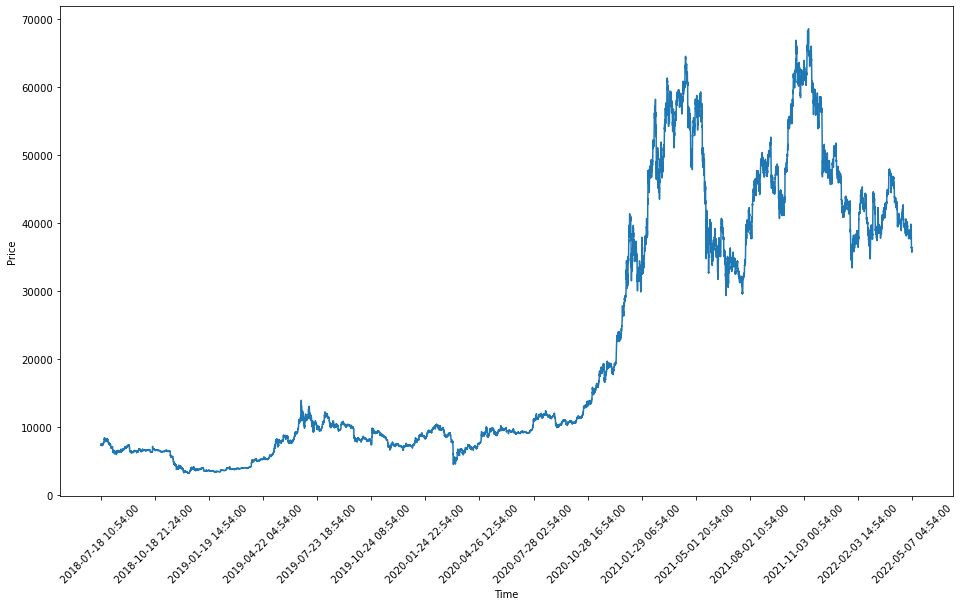

In [3]:
# Plot
plt.figure(figsize = (16,9))
plt.plot(np.arange(0,df.shape[0]),(df["Close"]+df["Open"])/2)
plt.xticks(np.arange(0,df.shape[0],len(df)//15), df["Time_UTC_Start"][::len(df)//15],rotation=45)
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

## Add more data

In [4]:
# df = Feature(df)

# for days in [5,10,14,20,26]:
#     df.price_SMA(days=days, inplace=True)
#     df.price_EMA(days=days, inplace=True)
#     df.price_WMA(days=days, inplace=True)
#     df.volumn_SMA(days=days, inplace=True)
#     df.volumn_EMA(days=days, inplace=True)
#     df.volumn_WMA(days=days, inplace=True)
#     df.MACD(inplace=True)
#     df.CCI(days=days, inplace=True)
#     df.std(days=days, inplace=True)
#     df.BOP(days=days, inplace=True)
#     df.ADX(days=days, inplace=True)
#     df.DX(days=days, inplace=True)
#     df.PPO(inplace=True)
#     df.RSI(days=days, inplace=True)
#     df.RS(days=days, inplace=True)
#     df.ATR(days=days, inplace=True)
#     df.MFI(days=days, inplace=True)
#     df.price_up_SMA(days=days, inplace=True)
#     df.price_down_SMA(days=days, inplace=True)

In [5]:
# df["Difference"] = df["Close"] - df["Open"]
# df.drop(columns=["Time_UTC_Start"], inplace=True)
# df.dropna(inplace=True)
# df.to_csv("df.csv")

In [6]:
df = pd.read_csv("df.csv")
# df = df.iloc[int(len(df)*0.8):,:]

In [7]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volumn', 'Timestamp End',
       'Quote_asset_volume', 'Number_of_trades', 'Taker_buy_base_asset_volume',
       ...
       'ADX26', 'ATR26', 'plus_DI26', 'minus_DI26', 'RSI26', 'RS26', 'MFI26',
       'price_up_SMA26', 'price_down_SMA26', 'Difference'],
      dtype='object', length=113)

In [8]:
df

,Timestamp,Open,High,Low,Close,Volumn,Timestamp End,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,...,ADX26,ATR26,plus_DI26,minus_DI26,RSI26,RS26,MFI26,price_up_SMA26,price_down_SMA26,Difference
0,1532098440000,7480.43,7521.07,7451.00,7469.15,1401.458847,1532102039999,1.048703e+07,8270,704.773144,...,18.872435,71.035000,526.667244,377.996221,47.212035,0.894371,48.129763,12.974231,-14.506538,-11.28
1,1532102040000,7469.00,7700.00,7464.36,7581.33,4615.914817,1532105639999,3.503576e+07,23273,2411.358529,...,19.013963,76.759231,914.131099,349.807590,56.422903,1.294783,48.281484,17.288846,-13.352692,112.33
2,1532105640000,7581.33,7584.19,7335.00,7358.11,5738.606542,1532109239999,4.259016e+07,26143,2721.748344,...,17.519009,81.827308,638.845411,566.677007,48.788719,0.952695,52.878558,17.288846,-18.147308,-223.22
3,1532109240000,7358.11,7390.00,7273.00,7354.96,3804.015115,1532112839999,2.789083e+07,17041,1605.661167,...,43.161031,83.568462,625.535029,520.117085,49.117112,0.965297,50.611447,17.288846,-17.910385,-3.15
4,1532112840000,7354.96,7387.31,7300.00,7343.99,2061.029345,1532116439999,1.514413e+07,10171,1141.609493,...,6.110141,83.849615,610.513786,444.431193,45.668428,0.840550,47.288022,15.409231,-18.332308,-10.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33250,1651892040000,35968.65,35974.33,35760.00,35889.40,896.214420,1651895639999,3.214347e+07,22739,409.205980,...,31.364130,320.878077,294.944881,666.635662,44.366105,0.797465,58.556861,53.511154,-67.101538,-79.25
33251,1651895640000,35889.40,35890.23,35755.85,35819.05,995.509940,1651899239999,3.565444e+07,24661,490.635660,...,34.217571,313.908846,256.465314,627.872741,39.278091,0.646852,59.590750,45.155000,-69.807308,-70.35
33252,1651899240000,35819.06,35897.44,35722.24,35858.28,966.414510,1651902839999,3.462155e+07,23920,445.316230,...,38.782773,316.458077,258.868413,642.336389,40.197731,0.672177,57.865866,46.663846,-69.421923,39.22
33253,1651902840000,35858.27,35909.75,35794.31,35795.55,882.049590,1651906439999,3.162087e+07,23246,408.638960,...,42.019594,313.700385,264.897054,614.939414,40.563962,0.682481,57.284599,46.663846,-68.373846,-62.72


In [9]:
# Convert all dataframes to numpy
train_df = df.iloc[0:int(len(df)*0.8),:]
train_data = train_df.to_numpy()
num_rows_train, num_cols_train = train_data.shape
test_df = df.iloc[int(len(df)*0.8):]
test_data = test_df.to_numpy()
num_rows_test, num_cols_test = test_data.shape

In [10]:
steps = 10

# Make copies of test_data and train_data
test_data_cpy = test_data.copy()
train_data_cpy = train_data.copy()

# MinMaxScaler for training data, we take only {steps} row before to apply MinMaxScaler() in these rows
for i in range(steps, num_rows_train):
    scaler = MinMaxScaler(feature_range=(-1,1)).fit(train_data_cpy[i-steps:i])
    train_data[i] = scaler.transform(train_data_cpy[i].reshape(1, -1))
    del scaler
    
train_data = train_data[steps+1:]
train_df = train_df.iloc[steps+1:,:]

In [11]:
# MinMaxScaler for test data, we take only {steps} row before to apply MinMaxScaler() in these rows
for i in range(num_rows_test):
    if i > steps:
        scaler = MinMaxScaler(feature_range=(-1,1)).fit(test_data_cpy[i-steps:i])
        test_data[i] = scaler.transform(test_data_cpy[i].reshape(1, -1))
        del scaler
    else:
        scaler = MinMaxScaler(feature_range=(-1,1)).fit(np.array(test_data_cpy[:i].tolist() + train_data_cpy[-steps:].tolist()))
        test_data[i] = scaler.transform(test_data_cpy[i].reshape(1, -1))
        del scaler

In [12]:
def split_sequences(data, window_size, diff_price_col_idx):
    x = []
    y = []
    for i in range(0,len(data)-window_size):
        x.append(data[i:i+window_size,:]) # Take window_size rows data before
        y.append(data[i+window_size,diff_price_col_idx]) # To predict the current value of 'difference' column
    return np.array(x), np.array(y)

In [13]:
train_data = np.asarray(train_data).astype('float32')
test_data = np.asarray(test_data).astype('float32')

x_train, y_train = split_sequences(train_data, steps, df.columns.get_loc("Difference"))
x_test, y_test = split_sequences(test_data, steps, df.columns.get_loc("Difference"))

In [14]:
num_of_main_layers = 4
num_of_outputs = 64
model_name = str(num_of_main_layers)+"BiLSTM"+str(num_of_outputs)+".h5"

In [38]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3' # For removing alert

print('Build model %s...'%(model_name))

model = Sequential()

for i in range(1,num_of_main_layers+1):
    if i != num_of_main_layers:
        model.add(
            Bidirectional(
                LSTM(64, return_sequences=True)
            )
        )
    else:
        model.add(
            Bidirectional(
                LSTM(64, return_sequences=False)
            )
        )
    
    model.add(BatchNormalization())

    model.add(Dropout(rate=0.2))

model.add(Dense(1))

opt = tf.keras.optimizers.Adam(
    learning_rate=0.001
)
model.compile(loss='mean_absolute_error', optimizer=opt)

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)

# First test fit:
print("First fit:")
model.fit(x_train, y_train, batch_size=32, epochs=1)
model._name = model_name
model.save(model_name)
print("Done!")

Build model 4BiLSTM64.h5...
First fit:
831/831 [==============================] - 11s 6ms/step - loss: 0.7253
Done!


In [18]:
print('Train...')

model = load_model(model_name)
opt = tf.keras.optimizers.Adam(
    learning_rate=0.00001
)
model.compile(loss='mean_absolute_error', optimizer=opt)
model.save(model_name)

for i in range(1,2):
    print("Load %i:"%i)
    model = load_model(model_name)
    model.fit(x_train, y_train, batch_size=32, epochs=10)
    model.save(model_name)

Train...
Load 1:
Epoch 1/10
831/831 [==============================] - 10s 6ms/step - loss: 0.2782
Epoch 2/10
831/831 [==============================] - 5s 6ms/step - loss: 0.2763
Epoch 3/10
831/831 [==============================] - 5s 6ms/step - loss: 0.2748
Epoch 4/10
831/831 [==============================] - 5s 6ms/step - loss: 0.2751
Epoch 5/10
831/831 [==============================] - 5s 6ms/step - loss: 0.2768
Epoch 6/10
831/831 [==============================] - 5s 6ms/step - loss: 0.2753
Epoch 7/10
831/831 [==============================] - 5s 6ms/step - loss: 0.2747
Epoch 8/10
831/831 [==============================] - 5s 6ms/step - loss: 0.2741
Epoch 9/10
831/831 [==============================] - 5s 6ms/step - loss: 0.2764
Epoch 10/10
831/831 [==============================] - 5s 6ms/step - loss: 0.2715


In [19]:
#test
print('Train...')
# model = load_model(model_name)
opt = tf.keras.optimizers.Adam(
    learning_rate=0.0001
)
def tien_loss(y_pred, y_true):
    b = y_pred * y_true > 0
    return tf.where(b, 0.8*abs(y_pred-y_true), 2*abs(y_pred-y_true))

model.compile(loss=tien_loss, optimizer=opt)
# model.save(model_name)

for i in range(1,3):
    print("Load %i:"%i)
    model.fit(x_train, y_train, batch_size=32, epochs=10)
#     model.save(model_name)

Train...


2022-06-01 22:28:52.979914: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-01 22:28:52.981231: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-01 22:28:52.981533: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-01 22:28:52.981662: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so ret

Load 1:
Epoch 1/10


2022-06-01 22:29:01.424184: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2022-06-01 22:29:01.659753: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


831/831 [==============================] - 14s 7ms/step - loss: 0.2709
Epoch 2/10
831/831 [==============================] - 5s 6ms/step - loss: 0.2689
Epoch 3/10
831/831 [==============================] - 5s 6ms/step - loss: 0.2666
Epoch 4/10
831/831 [==============================] - 5s 6ms/step - loss: 0.2747
Epoch 5/10
831/831 [==============================] - 5s 6ms/step - loss: 0.2682
Epoch 6/10
831/831 [==============================] - 5s 6ms/step - loss: 0.2680
Epoch 7/10
831/831 [==============================] - 5s 6ms/step - loss: 0.2648
Epoch 8/10
831/831 [==============================] - 5s 6ms/step - loss: 0.2662
Epoch 9/10
831/831 [==============================] - 5s 6ms/step - loss: 0.2676
Epoch 10/10
831/831 [==============================] - 5s 6ms/step - loss: 0.2646
Load 2:
Epoch 1/10
831/831 [==============================] - 5s 6ms/step - loss: 0.2683
Epoch 2/10
831/831 [==============================] - 5s 6ms/step - loss: 0.2670
Epoch 3/10
831/831 [=========

In [19]:
model = load_model(model_name)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 10, 128)          91136     
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, 10, 128)          512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 10, 128)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 10, 128)          98816     
 nal)                                                            
                                                                 
 batch_normalization_1 (Batc  (None, 10, 128)          512       
 hNormalization)                                        

In [21]:
# model.save('my_model.h5')

In [20]:
def accuracy(x_np, y_np, data_df):
    def relabel(x):
        if x > 0:
            return 1
        return 0
    
    # Calculate the predicted values
    pred = model.predict(x_np)

    # Save to the csv files
    pd.DataFrame(pred).to_csv("pred_train.csv")
    pd.DataFrame(y_np).to_csv("y_train.csv")


    # Read the csv files
    pred = pd.read_csv("pred_train.csv")
    y_np = pd.read_csv("y_train.csv")

    # Drop unnecessary columns
    pred.drop(columns=["Unnamed: 0"], inplace=True)
    y_np.drop(columns=["Unnamed: 0"], inplace=True)


    '''
    np.vectorize(relabel) creates a mapping using relabel function
    float(sum(diff_label == pred_label)/len(pred_label)) calculates the accuracy of the prediction
    '''

    pred_label = np.vectorize(relabel)(pred)
    diff_label = data_df["label"][-len(pred):].to_numpy().reshape(-1,1)
    print("Accuracy in the training set: %f" % (float(sum(diff_label == pred_label)/len(diff_label))))

In [ ]:
accuracy(x_train, y_train, train_df)
accuracy(x_test, y_test, test_df)